# Load Packages

In [1]:
# Import required Dependencies
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Error Metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Classifiers
from sklearn import svm
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Cross Validation 
from sklearn.model_selection import GridSearchCV

In [2]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "plants"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches='tight')

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
# df = train_df.append(test_df)
# Load all csv file in dataframe
df = pd.read_csv("all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4400 entries, 0 to 1099
Columns: 40001 entries, label to pixel39999
dtypes: int64(40000), object(1)
memory usage: 1.3+ GB


In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel39990,pixel39991,pixel39992,pixel39993,pixel39994,pixel39995,pixel39996,pixel39997,pixel39998,pixel39999
0,Atriplex,88,111,88,73,39,37,53,42,44,...,123,86,75,67,98,137,148,178,188,168
1,Atriplex,109,123,76,70,91,114,103,87,57,...,179,186,189,193,187,187,185,183,183,183
2,Atriplex,74,77,84,60,66,155,65,72,89,...,199,170,192,239,245,225,215,225,224,225
3,Atriplex,29,51,55,56,35,69,36,45,51,...,53,55,67,110,158,168,163,184,187,197
4,Atriplex,39,49,136,65,17,10,12,21,41,...,169,170,181,192,188,191,191,173,179,188


In [6]:
df.label.value_counts()

Atriplex                 400
Calotropis procera       400
Capparis                 400
Deplotaxis harra         400
Forskalii                400
Heliotropium             400
Lycium shawii            400
Ocradinus                400
Pharsetia aegyptia       400
Zilla spinosa            400
Zygophyllum coccinium    400
Name: label, dtype: int64

In [8]:
df.isnull().sum()

label         0
pixel0        0
pixel1        0
pixel2        0
pixel3        0
             ..
pixel39995    0
pixel39996    0
pixel39997    0
pixel39998    0
pixel39999    0
Length: 40001, dtype: int64

In [9]:
# average values/distributions of features
description = df.describe()
description

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel39990,pixel39991,pixel39992,pixel39993,pixel39994,pixel39995,pixel39996,pixel39997,pixel39998,pixel39999
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,...,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,147.846818,148.061136,148.150455,147.713409,146.667045,148.185455,148.241591,149.102727,148.324091,148.221818,...,122.019545,121.823864,120.759318,121.628182,122.100682,121.042500,120.713864,120.187273,120.156136,121.302045
std,58.279314,58.254313,58.245513,58.154261,58.165709,58.413909,58.050903,58.798440,57.933964,58.166979,...,55.737936,56.119114,55.879787,55.948125,56.339859,56.091146,56.398024,56.178938,56.447590,56.284447
min,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,7.000000,3.000000,7.000000,0.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,102.000000,104.000000,103.000000,103.000000,103.000000,104.000000,104.000000,104.000000,104.000000,103.000000,...,77.000000,76.000000,77.000000,77.000000,77.000000,77.000000,77.000000,75.000000,75.000000,77.000000
50%,151.000000,149.000000,151.000000,150.000000,149.000000,150.000000,151.000000,152.000000,150.000000,151.000000,...,117.000000,117.000000,115.000000,117.000000,117.000000,116.000000,115.000000,114.000000,114.000000,116.000000
75%,195.000000,196.000000,195.250000,195.000000,194.000000,196.000000,195.000000,197.000000,196.000000,196.000000,...,165.000000,165.000000,163.000000,165.000000,165.000000,164.250000,163.250000,163.000000,163.000000,165.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


## Data Preparation for Model Building

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Creating training and test sets
# Splitting the data into train and test
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

# Rescaling the features
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

# train test split with train_size=80% and test_size=20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3520, 40000)
(880, 40000)
(3520,)
(880,)


### Classifiers

#### GridSearch or testing many parameters each classifier

In [9]:
def set_grid(est, param, cv = 20):
    cv = GridSearchCV(
        estimator = est,
        param_grid = param,
        cv = cv,
        scoring = "accuracy",
        verbose = 0
    )
    return cv

def print_results(model_cv, X_test_s, y_test):
    return (model_cv.best_score_, model_cv.best_params_, model_cv.score(X_test_s, y_test))

### KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()
param_cv = {"n_neighbors" : range(1, 25)}

knn_cv = set_grid(knn, param_cv)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)}, scoring='accuracy')

In [14]:
print_results(knn_cv, X_test, y_test)

(0.3042613636363636, {'n_neighbors': 1}, 0.3090909090909091)

In [15]:
# evaluation: Confusion Matrix
confusion_knn = metrics.confusion_matrix(y_true = y_test, y_pred = knn_cv.predict(X_test))
confusion_knn

array([[35,  0,  0,  5,  1,  0,  0,  0,  9,  1, 30],
       [ 0,  7,  0, 28,  0,  0,  2,  3, 16,  0, 17],
       [ 0,  0,  1, 21,  0,  0,  3,  3, 17,  0, 35],
       [ 0,  0,  0, 51,  0,  0,  1,  2, 13,  0,  9],
       [ 0,  0,  2, 17, 20,  0,  0,  6, 14,  1, 32],
       [ 0,  0,  0, 27,  1, 21,  5,  1, 13,  0, 23],
       [ 0,  0,  0, 24,  0,  0,  9,  0, 15,  1, 31],
       [ 0,  0,  0, 16,  4,  0,  3, 16, 21,  1, 24],
       [ 0,  0,  0, 14,  0,  0,  2,  0, 63,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  2,  1, 15,  2, 21],
       [ 0,  1,  0, 24,  1,  0,  8,  0,  3,  0, 47]], dtype=int64)

In [16]:
plants = df.label.unique()
plants

array(['Atriplex', 'Calotropis procera', 'Capparis', 'Deplotaxis harra',
       'Forskalii', 'Heliotropium', 'Lycium shawii', 'Ocradinus',
       'Pharsetia aegyptia', 'Zilla spinosa', 'Zygophyllum coccinium'],
      dtype=object)

Saving figure KNeighbors_cm


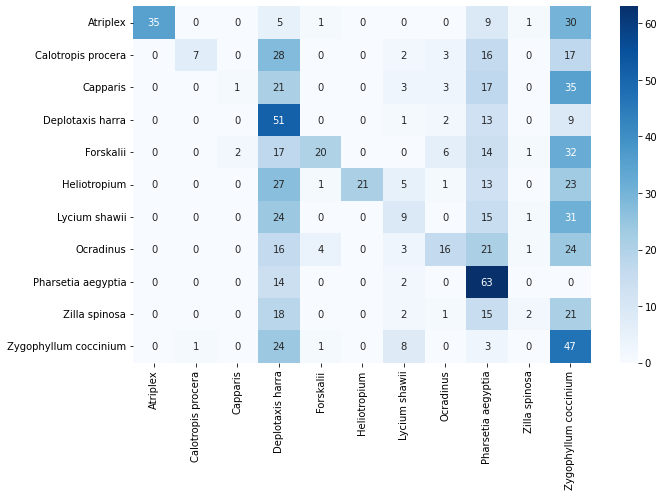

In [17]:
df_cm_knn = pd.DataFrame(confusion_knn, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_knn, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("KNeighbors_cm")

In [18]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=knn_cv.predict(X_test))

0.3090909090909091

### DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier(criterion='gini')
param_cv = {"max_depth" : [5, 7, 10], "min_samples_split" : [30, 40, 45]}
dt_cv = set_grid(dt, param_cv)
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [30, 40, 45]},
             scoring='accuracy')

In [30]:
print_results(dt_cv, X_test, y_test)

(0.2923295454545455,
 {'max_depth': 10, 'min_samples_split': 40},
 0.30227272727272725)

In [31]:
# evaluation: Confusion Matrix
confusion_dt = metrics.confusion_matrix(y_true = y_test, y_pred = dt_cv.predict(X_test))
confusion_dt

array([[32,  0,  6,  2,  0,  3,  1,  4, 16, 12,  5],
       [ 3,  1,  1,  7,  1,  1,  7, 14, 22, 14,  2],
       [ 7,  4, 10,  6,  2,  3,  3, 16, 13,  9,  7],
       [ 1,  1,  1, 22,  0,  2,  2,  6, 28, 11,  2],
       [ 0,  0,  0,  0, 92,  0,  0,  0,  0,  0,  0],
       [ 6,  7,  1,  4,  0, 20,  2, 12, 22, 12,  5],
       [ 5,  1,  2, 12,  0,  1,  4, 10, 34,  4,  7],
       [ 4,  3,  4,  9,  0,  1,  3, 16, 23, 13,  9],
       [ 2,  0,  2,  7,  0,  0,  3, 14, 43,  8,  0],
       [ 2,  1,  7,  5,  0,  0,  2,  9, 16, 13,  4],
       [ 5,  3, 15,  6,  0,  0,  2, 10, 15, 15, 13]], dtype=int64)

Saving figure Decision_tree_cm


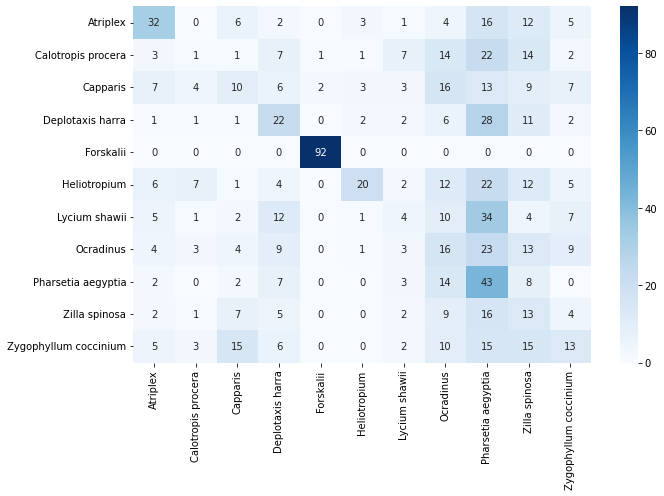

In [32]:
df_cm_dt = pd.DataFrame(confusion_dt, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_dt, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("Decision_tree_cm")

In [33]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=dt_cv.predict(X_test))

0.30227272727272725

### RandomForestClassifier

In [34]:
rf = RandomForestClassifier(n_estimators = 500)
param_cv = {"max_depth" : [5, 7, 10], "min_samples_split" : [30, 40, 45]}
rf_cv = set_grid(rf, param_cv)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(n_estimators=500),
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [30, 40, 45]},
             scoring='accuracy')

In [35]:
print_results(rf_cv, X_test, y_test)

(0.5079545454545454,
 {'max_depth': 10, 'min_samples_split': 30},
 0.5409090909090909)

In [36]:
# evaluation: Confusion Matrix
confusion_rf = metrics.confusion_matrix(y_true = y_test, y_pred = rf_cv.predict(X_test))
confusion_rf

array([[51,  0,  1,  5,  0,  3,  0,  1,  1,  8, 11],
       [ 3, 10,  2, 18,  1,  5,  0,  8,  9,  5, 12],
       [ 7,  0, 24,  8,  2, 10,  1,  8,  2,  4, 14],
       [ 0,  3,  0, 57,  0,  2,  1,  2,  5,  4,  2],
       [ 0,  0,  0,  0, 92,  0,  0,  0,  0,  0,  0],
       [11,  2,  1,  2,  0, 59,  0,  5,  0,  2,  9],
       [11,  1,  1, 28,  1,  1,  5,  4, 11,  9,  8],
       [10,  6,  0, 11,  0,  1,  0, 41,  2,  2, 12],
       [ 2,  0,  0,  9,  0,  1,  0,  2, 61,  4,  0],
       [ 5,  7,  0, 10,  1,  2,  1,  8,  2, 15,  8],
       [ 7,  0,  0,  8,  0,  2,  0,  0,  3,  3, 61]], dtype=int64)

Saving figure Random_forest_cm


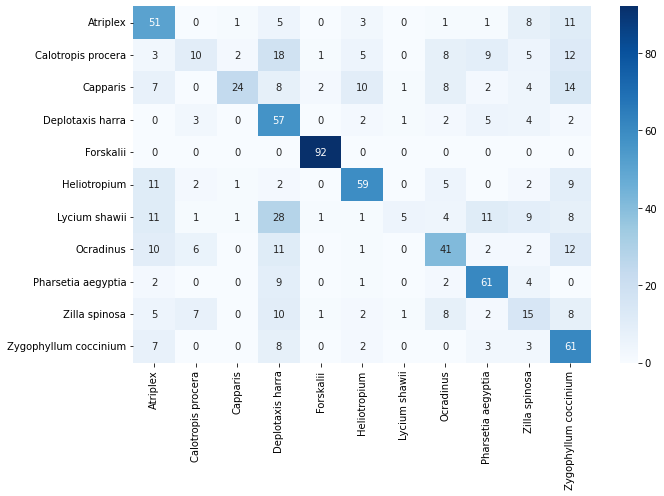

In [37]:
df_cm_rf = pd.DataFrame(confusion_rf, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_rf, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("Random_forest_cm")

In [38]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=rf_cv.predict(X_test))

0.5409090909090909

### GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 700)
param_cv = {"learning_rate" : [0.001, 0.01, 1, 5], "max_depth": [3, 10, 15]}
gb_cv = set_grid(gb, param_cv)
gb_cv.fit(X_train, y_train)

In [ ]:
print_results(gb_cv, X_test, y_test)

In [ ]:
# evaluation: Confusion Matrix
confusion_gb = metrics.confusion_matrix(y_true = y_test, y_pred = gb_cv.predict(X_test))
confusion_gb

In [ ]:
df_cm_gb = pd.DataFrame(confusion_gb, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_gb, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("gradient_boosting_cm")

In [ ]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=gb_cv.predict(X_test))

### SVM Linear

In [19]:
svc_linear = SVC(kernel = "linear")
param_cv = {"C": [0.001, 0.01, 1, 3]}
svc_linear_cv = set_grid(svc_linear, param_cv)
svc_linear_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 1, 3]}, scoring='accuracy')

In [20]:
print_results(svc_linear_cv, X_test, y_test)

(0.46079545454545456, {'C': 0.01}, 0.46136363636363636)

In [21]:
# evaluation: Confusion Matrix
confusion_svml = metrics.confusion_matrix(y_true = y_test, y_pred = svc_linear_cv.predict(X_test))
confusion_svml

array([[58,  4,  0,  2,  2,  2,  2,  4,  0,  2,  5],
       [ 3, 23,  3,  7,  0,  4, 12,  7,  5,  1,  8],
       [ 3,  7,  6, 12,  3,  3, 11,  4,  1,  6, 24],
       [ 2, 13,  3, 40,  0,  0,  9,  1,  0,  6,  2],
       [ 6,  5,  1,  6, 58,  3,  3,  2,  0,  5,  3],
       [ 5, 10,  4,  8,  1, 42,  8,  2,  1,  2,  8],
       [ 7,  6,  2, 19,  3,  3, 19,  5,  4,  3,  9],
       [ 2, 12,  1, 10,  0,  2,  6, 40,  0,  3,  9],
       [ 0,  3,  0,  6,  1,  1,  2,  0, 60,  4,  2],
       [ 1, 12,  6,  7,  2,  3, 10,  9,  1,  3,  5],
       [ 5,  2,  3,  6,  1,  3,  5,  0,  1,  1, 57]], dtype=int64)

Saving figure svm_linear_cm


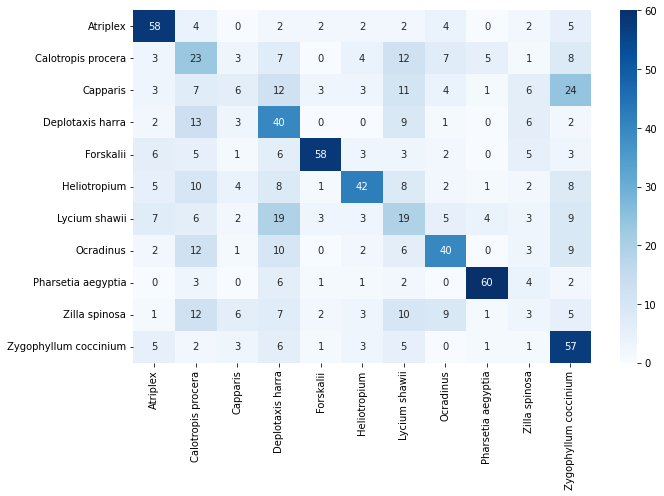

In [22]:
df_cm_svml = pd.DataFrame(confusion_svml, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_svml, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("svm_linear_cm")

In [23]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=svc_linear_cv.predict(X_test))

0.46136363636363636

### SVM rbf

In [24]:
svc_rb = SVC(kernel = "rbf")
param_cv = {"C" : [10, 20, 30, 40], "gamma" : [0.1, 0.5, 1, 5, 10]}
svc_rb_cv = set_grid(svc_rb, param_cv)
svc_rb_cv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid={'C': [10, 20, 30, 40], 'gamma': [0.1, 0.5, 1, 5, 10]},
             scoring='accuracy')

In [25]:
print_results(svc_rb_cv, X_test, y_test)

(0.14857954545454544, {'C': 10, 'gamma': 0.1}, 0.12613636363636363)

In [26]:
# evaluation: Confusion Matrix
confusion_svmr = metrics.confusion_matrix(y_true = y_test, y_pred = svc_rb_cv.predict(X_test))
confusion_svmr

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 81,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 73,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 76,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 92,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 91,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 85,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 52, 27,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 84,  0]], dtype=int64)

Saving figure svm_rbf_cm


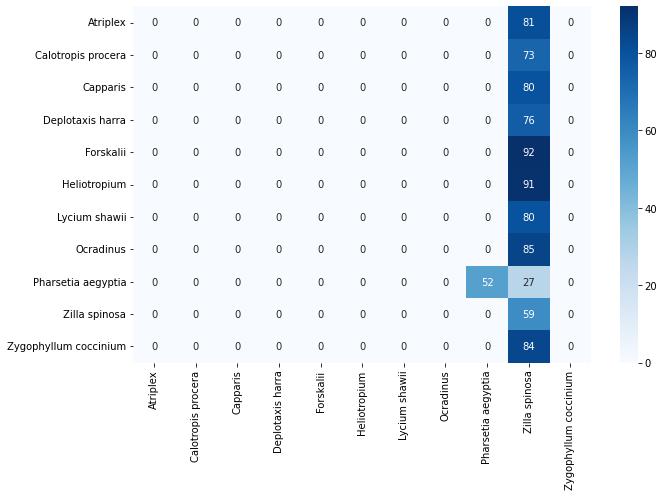

In [27]:
df_cm_svmr = pd.DataFrame(confusion_svmr, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_svmr, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("svm_rbf_cm")

In [28]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=svc_rb_cv.predict(X_test))

0.12613636363636363

### VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('svc_rbf', SVC(kernel = "rbf", C = 20, gamma = 0.5)),
    ('gb', GradientBoostingClassifier(learning_rate = 0.01, max_depth = 10)),
    ('rv', RandomForestClassifier(n_estimators = 700, max_depth = 7, min_samples_split = 30)),
    ('lg', LogisticRegression())
]

clf = VotingClassifier(classifiers, voting = "hard")

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
print_results(clf, X_test, y_test)

In [ ]:
# evaluation: Confusion Matrix
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = clf.predict(X_test))
confusion

In [ ]:
df_cm = pd.DataFrame(confusion, index = [i for i in plants],
                  columns = [i for i in plants])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("clf_cm")

In [ ]:
# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))